In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(11,8)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
# sns.pairplot(df, hue='Population')
# plt.show()

In [3]:
df = pd.read_csv("covid_worldwide.csv")

In [4]:
data = df.copy()

In [5]:
# drop unwanted colums
data.drop("Serial Number",axis=1,inplace=True)

In [6]:
data.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [7]:
data.tail()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
226,Diamond Princess,712,13,699,0,NaN,NaN
227,Vatican City,29,NaN,29,0,NaN,799
228,Western Sahara,10,1,9,0,NaN,"626,161"
229,MS Zaandam,9,2,7,0,NaN,NaN
230,Tokelau,5,NaN,NaN,5,NaN,"1,378"


In [8]:
data.shape

(231, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          231 non-null    object
 1   Total Cases      231 non-null    object
 2   Total Deaths     225 non-null    object
 3   Total Recovered  210 non-null    object
 4   Active Cases     212 non-null    object
 5   Total Test       213 non-null    object
 6   Population       228 non-null    object
dtypes: object(7)
memory usage: 12.8+ KB


In [10]:
data.columns

Index(['Country', 'Total Cases', 'Total Deaths', 'Total Recovered',
       'Active Cases', 'Total Test', 'Population'],
      dtype='object')

## data cleaning

In [11]:
# remove , from totalcase and replace with no space and onvert in to numeric
data["Total Cases"] = data["Total Cases"].apply(lambda x:x.replace(",","")).astype(int)

In [12]:
# replace nan value with median and convert in to numeric value 
data["Total Deaths"] = data["Total Deaths"].str.replace(",","").astype(float)
data["Total Deaths"] = data["Total Deaths"].fillna(st.median(data["Total Deaths"])) 
data["Total Deaths"] = data["Total Deaths"].astype(int)

In [13]:
# replace nan value with median and convert in to numeric value 
data["Total Recovered"] = data["Total Recovered"].str.replace(",","").astype(float)
data["Total Recovered"] = data["Total Recovered"].fillna(np.nanmedian(data["Total Recovered"]))
data["Total Recovered"] = data["Total Recovered"].astype(int)

In [14]:
# replace nan value with median and convert in to numeric value 
data["Active Cases"] = data["Active Cases"].str.replace(",","").astype(float)
data["Active Cases"] = data["Active Cases"].fillna(np.nanmedian(data["Active Cases"]))
data["Active Cases"] = data["Active Cases"].astype(int)

In [15]:
# replace nan value with median and convert in to numeric value 
data["Total Test"] = data["Total Test"].str.replace(",","").astype(float)
data["Total Test"] = data["Total Test"].fillna(np.nanmedian(data["Total Test"]))
data["Total Test"] = data["Total Test"].astype(int)

In [16]:
data["Population"] = data["Population"].str.replace(",","").astype(float)
data["Population"] = data["Population"].fillna(np.nanmedian(data["Population"]))
data["Population"] = data["Population"].astype(int)

In [18]:
# no null value in data set now
data.isnull().sum()

Country            0
Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Total Test         0
Population         0
dtype: int64

In [22]:
# no duplicate value in data set
data.duplicated().sum()

0

In [24]:
data.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,USA,104196861,1132935,101322779,1741147,1159832679,334805269
1,India,44682784,530740,44150289,1755,915265788,1406631776
2,France,39524311,164233,39264546,95532,271490188,65584518
3,Germany,37779833,165711,37398100,216022,122332384,83883596
4,Brazil,36824580,697074,35919372,208134,63776166,215353593


In [25]:
data.shape

(231, 7)

In [26]:
data.describe()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
count,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02
mean,2.923460e+06,2.934381e+04,2.743109e+06,8.360581e+04,3.013392e+07,2.819694e+07
std,9.479286e+06,1.040892e+05,9.109928e+06,7.344685e+05,1.133283e+08,1.016440e+08
min,5.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,7.850000e+03,7.990000e+02
25%,2.400100e+04,2.250000e+02,2.845900e+04,6.300000e+01,4.059510e+05,4.932080e+05
50%,2.065920e+05,2.570000e+03,2.351450e+05,1.115000e+03,2.216193e+06,5.676382e+06
75%,1.296146e+06,1.390850e+04,1.255186e+06,9.328500e+03,1.148478e+07,2.152480e+07
max,1.041969e+08,1.132935e+06,1.013228e+08,1.095262e+07,1.159833e+09,1.406632e+09


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          231 non-null    object
 1   Total Cases      231 non-null    int32 
 2   Total Deaths     231 non-null    int32 
 3   Total Recovered  231 non-null    int32 
 4   Active Cases     231 non-null    int32 
 5   Total Test       231 non-null    int32 
 6   Population       231 non-null    int32 
dtypes: int32(6), object(1)
memory usage: 7.3+ KB


In [35]:
numeric_features = data.dtypes[data.dtypes != "object"].index

In [36]:
numeric_features

Index(['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases',
       'Total Test', 'Population'],
      dtype='object')

Index(['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases',
       'Total Test', 'Population'],
      dtype='object')


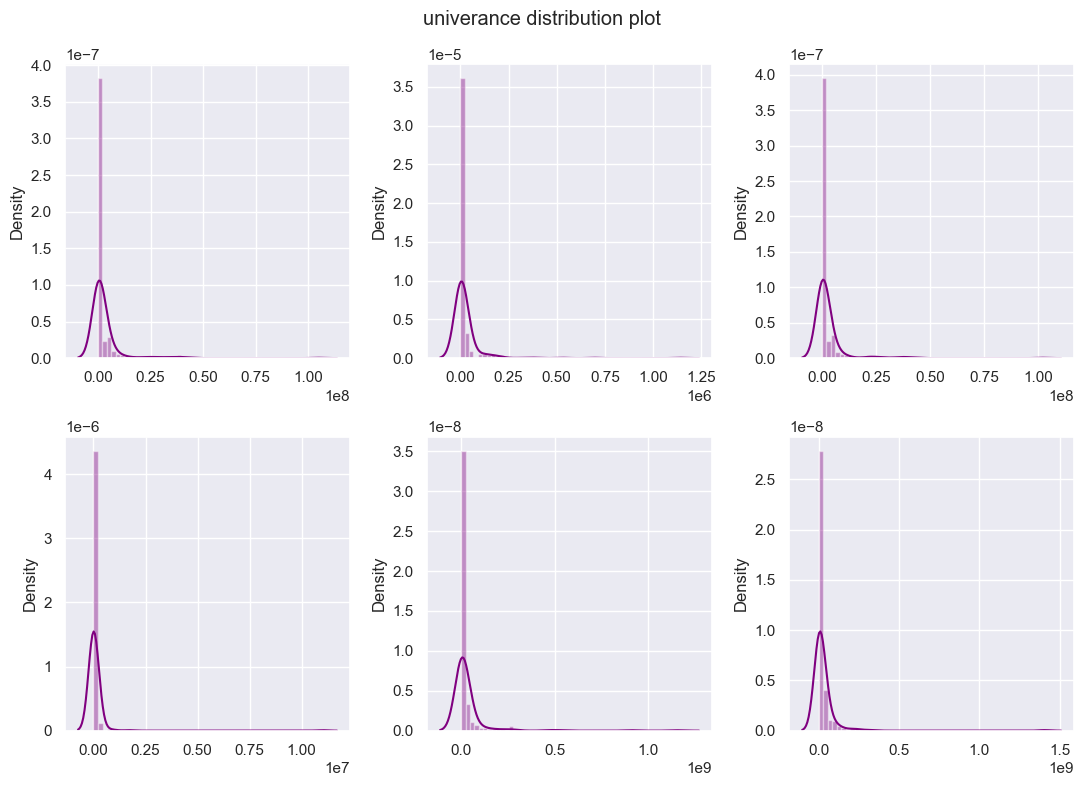

In [44]:
# check distribution of data
print(numeric_features)
try:
    plt.suptitle("univerance distribution plot")
    for i in range(0,len(numeric_features)):
        plt.subplot(2,3,i+1)
        sns.distplot(x=data[numeric_features[i]],color="purple")
        plt.tight_layout()
except Exception as e:
    print(e)

Index(['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases',
       'Total Test', 'Population'],
      dtype='object')


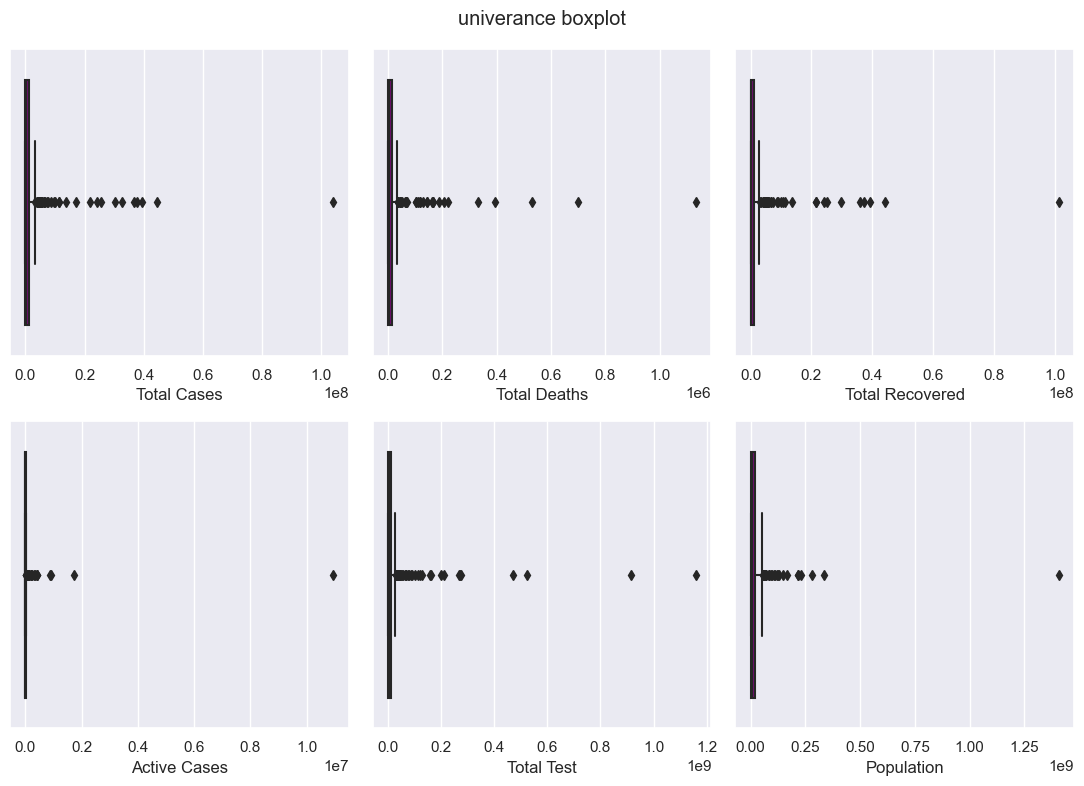

In [45]:
# check outlayers in data using boxplot
print(numeric_features)
try:
    plt.suptitle("univerance boxplot")
    for i in range(0,len(numeric_features)):
        plt.subplot(2,3,i+1)
        sns.boxplot(x=data[numeric_features[i]],color="purple")
        plt.tight_layout()
except Exception as e:
    print(e)

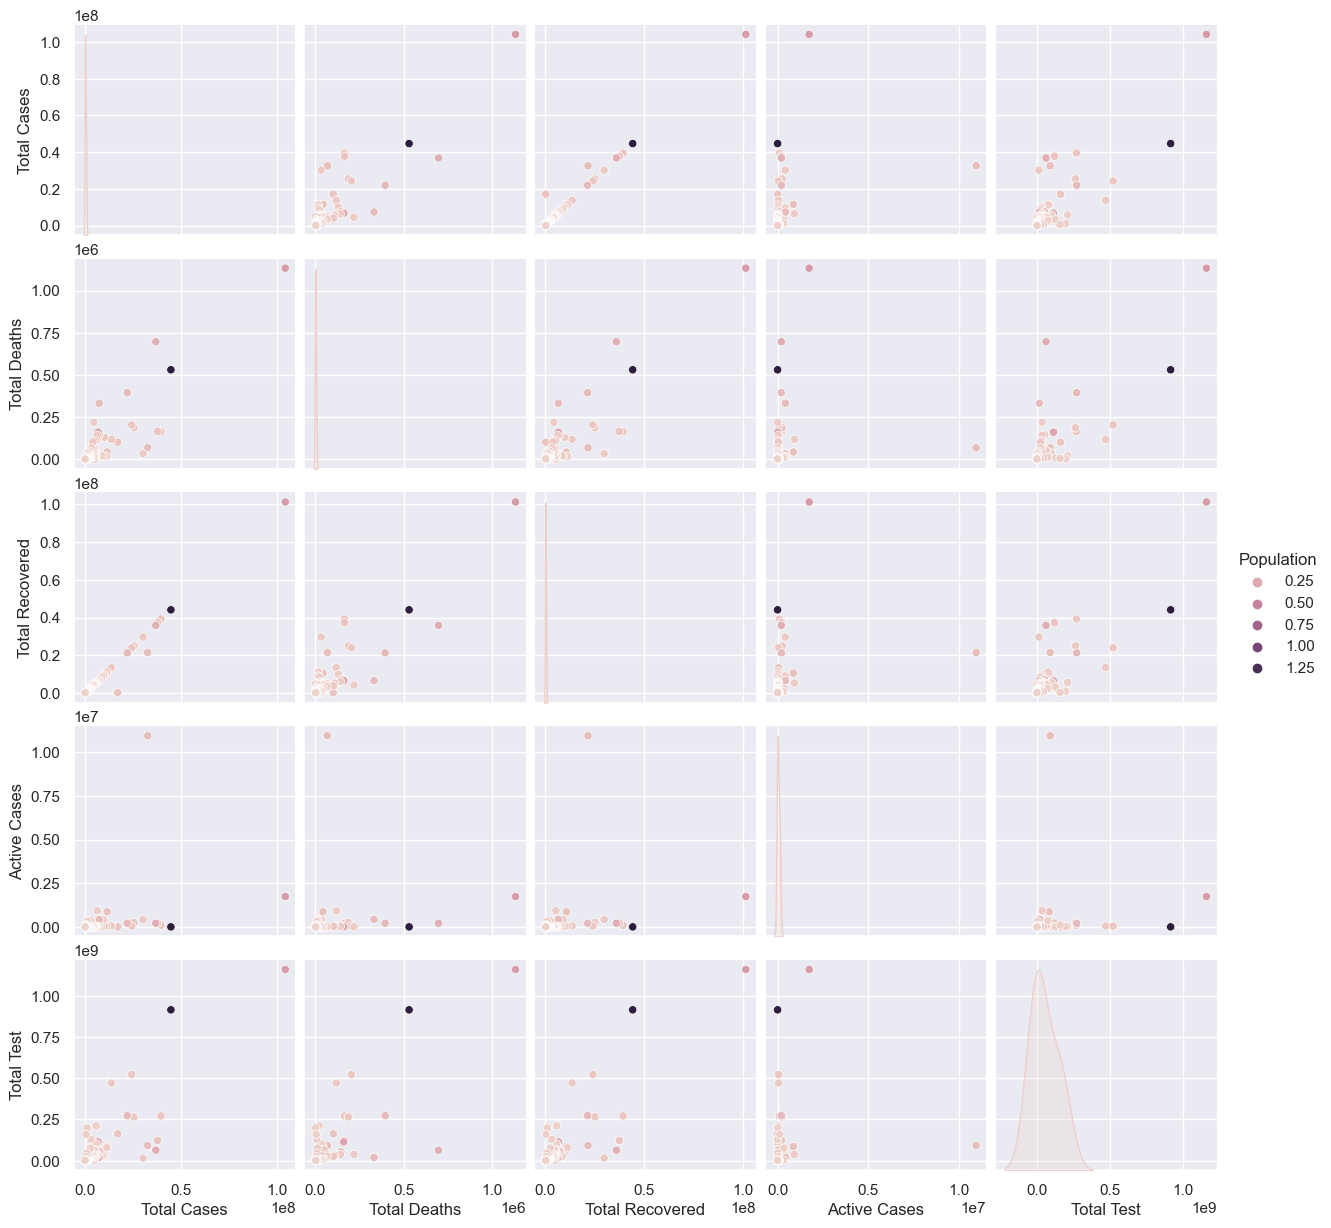

In [48]:
sns.pairplot(data,hue='Population')
plt.show()

In [62]:
# gihhest number fo cases
top10highestcases= data.groupby("Country")["Total Cases"].sum().sort_values(ascending=False).reset_index().head(10)

In [63]:
top10highestcases  

,Country,Total Cases
0,USA,104196861
1,India,44682784
2,France,39524311
3,Germany,37779833
4,Brazil,36824580
5,Japan,32588442
6,S. Korea,30197066
7,Italy,25453789
8,UK,24274361
9,Russia,21958696


<AxesSubplot:title={'center':'top 10 highest cases country'}, xlabel='Country', ylabel='Total Cases'>

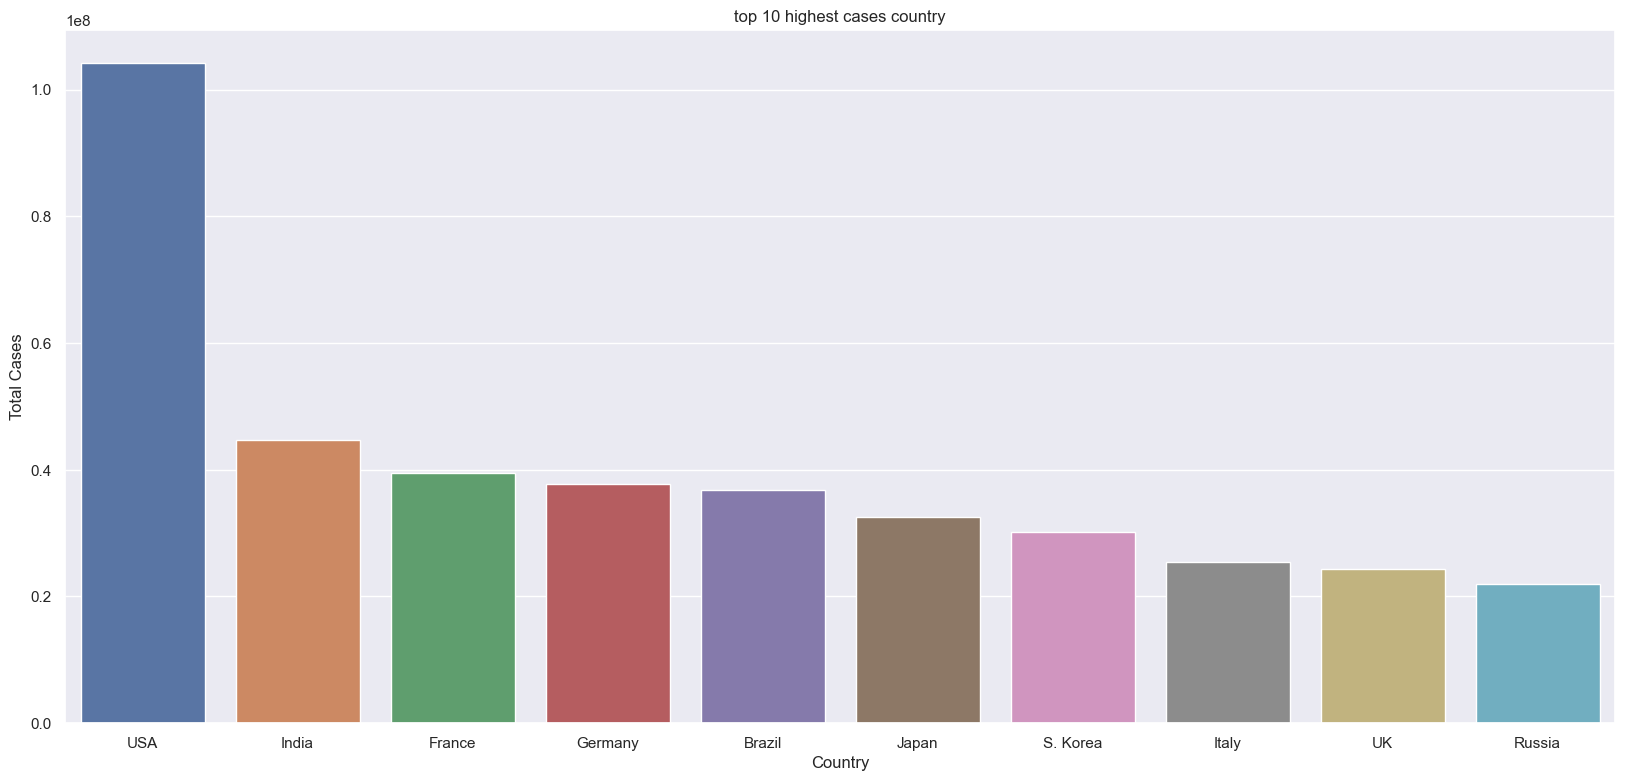

In [64]:
plt.figure(figsize=(20,9))
plt.title("top 10 highest cases country")
sns.barplot(x="Country",y="Total Cases",data=top10highestcases)

In [87]:
top4lower_cases = data.groupby("Country")["Total Cases"].sum().sort_values(ascending=False).reset_index().tail(4)

In [88]:
top4lower_cases

,Country,Total Cases
227,Vatican City,29
228,Western Sahara,10
229,MS Zaandam,9
230,Tokelau,5


<AxesSubplot:title={'center':'less number of cases in countrys'}, xlabel='Country', ylabel='Total Cases'>

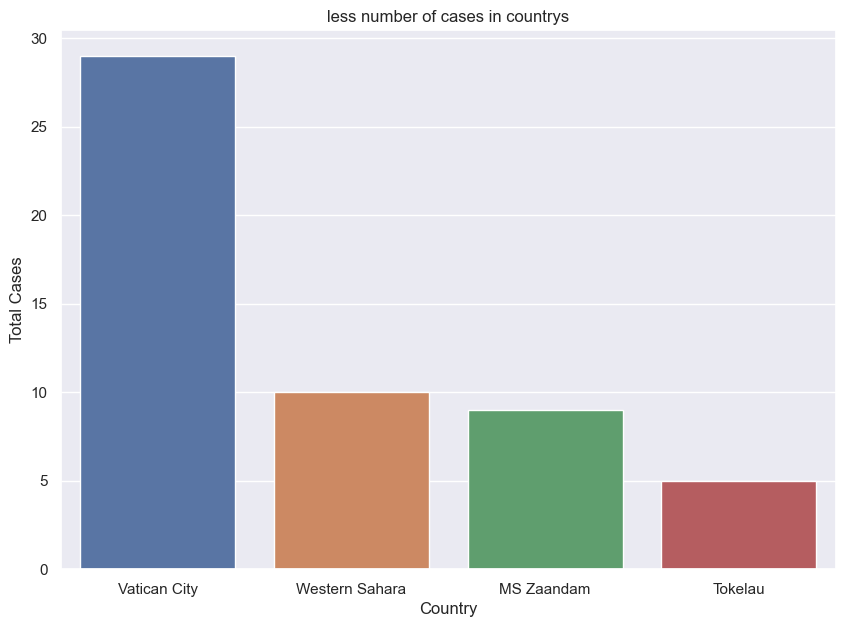

In [90]:
plt.figure(figsize=(10,7))
plt.title("less number of cases in countrys")
sns.barplot(x="Country",y="Total Cases",data=top4lower_cases)

In [94]:
top10country_totaldeath = data.groupby("Country")["Total Deaths"].sum().sort_values(ascending=False).reset_index().head(10)

In [95]:
top10country_totaldeath

,Country,Total Deaths
0,USA,1132935
1,Brazil,697074
2,India,530740
3,Russia,395108
4,Mexico,332198
5,Peru,218931
6,UK,204171
7,Italy,186833
8,Germany,165711
9,France,164233


<AxesSubplot:title={'center':'top 10 highest Total Deaths country'}, xlabel='Country', ylabel='Total Deaths'>

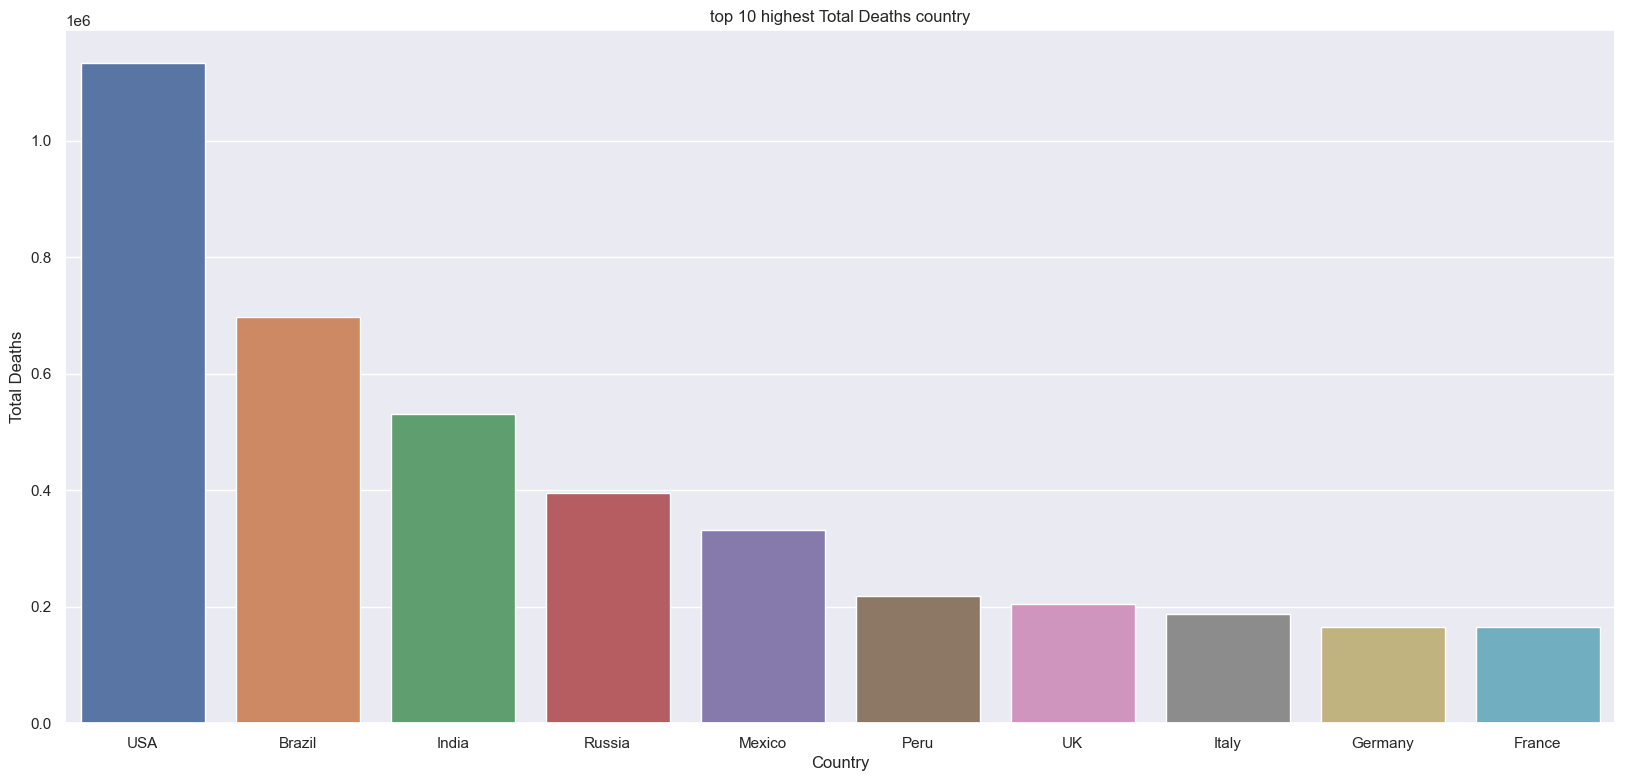

In [97]:
plt.figure(figsize=(20,9))
plt.title("top 10 highest Total Deaths country")
sns.barplot(x="Country",y="Total Deaths",data=top10country_totaldeath)

In [100]:
lowestdeath = data.groupby("Country")["Total Deaths"].sum().sort_values(ascending=False).reset_index().tail(5)

In [101]:
lowestdeath

,Country,Total Deaths
226,MS Zaandam,2
227,Cook Islands,2
228,Saint Pierre Miquelon,2
229,Nauru,1
230,Western Sahara,1


<AxesSubplot:title={'center':'top 5 lowest Total Deaths country'}, xlabel='Country', ylabel='Total Deaths'>

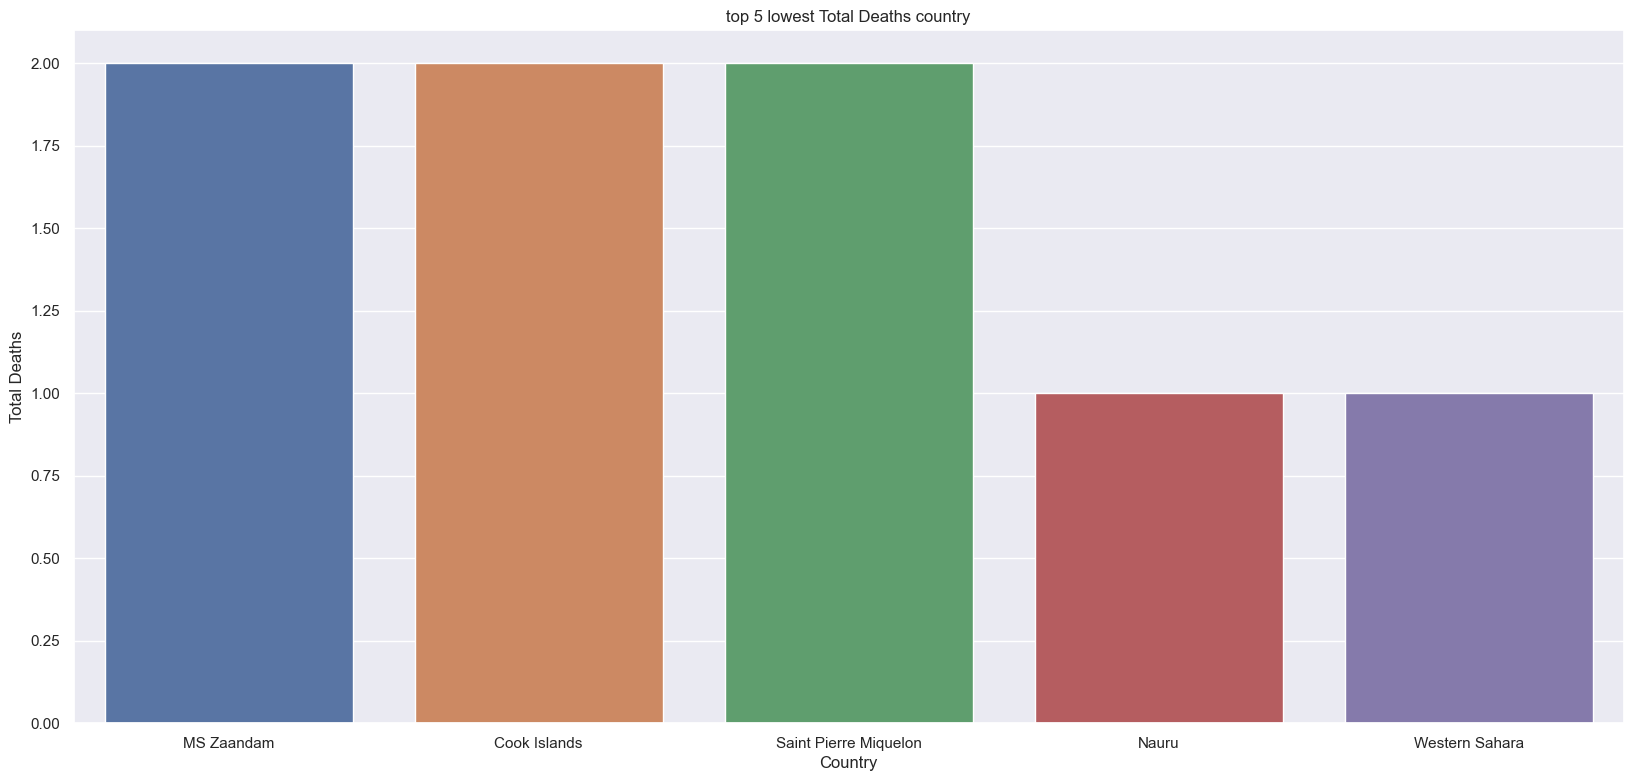

In [102]:
plt.figure(figsize=(20,9))
plt.title("top 5 lowest Total Deaths country")
sns.barplot(x="Country",y="Total Deaths",data=lowestdeath)

In [110]:
total_recovary = data.groupby("Country")["Total Recovered"].sum().sort_values(ascending=False)[:10]

<AxesSubplot:ylabel='Total Recovered'>

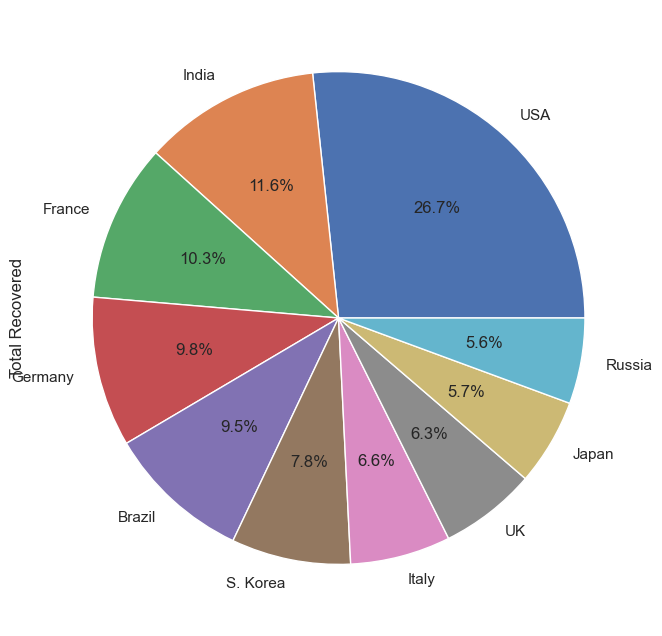

In [113]:
# top10 total recovary countries 
total_recovary.plot.pie(autopct="%1.1f%%")

In [119]:
_15country_activecases = data.groupby("Country")["Active Cases"].sum().sort_values(ascending=False).reset_index().head(15)

In [120]:
_15country_activecases

,Country,Active Cases
0,Japan,10952618
1,USA,1741147
2,Poland,925549
3,Vietnam,870843
4,Mexico,429421
5,Taiwan,423489
6,S. Korea,422703
7,Hong Kong,354439
8,Costa Rica,316307
9,Italy,251970


<AxesSubplot:title={'center':'15 countries have highest active cases'}, xlabel='Active Cases', ylabel='Country'>

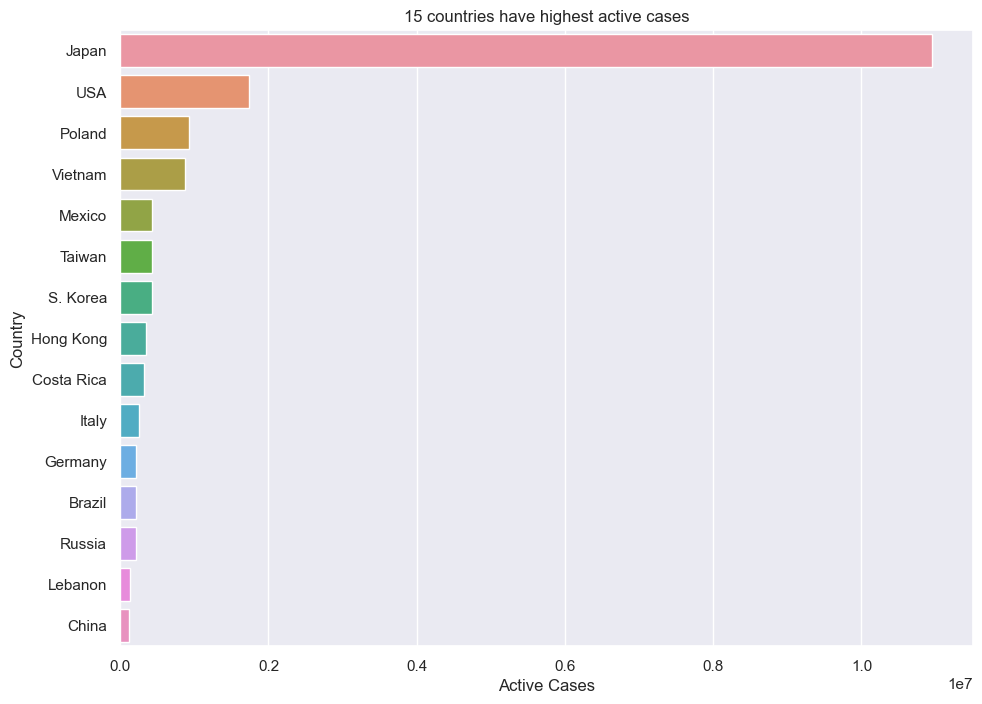

In [123]:
plt.title("15 countries have highest active cases")
sns.barplot(x="Active Cases",y="Country",data=_15country_activecases)

In [129]:
population = data.groupby("Country")["Population"].sum().sort_values(ascending=False).reset_index().head(5)

In [130]:
population

,Country,Population
0,India,1406631776
1,USA,334805269
2,Indonesia,279134505
3,Pakistan,229488994
4,Nigeria,216746934


<AxesSubplot:title={'center':'population'}, xlabel='Country', ylabel='Population'>

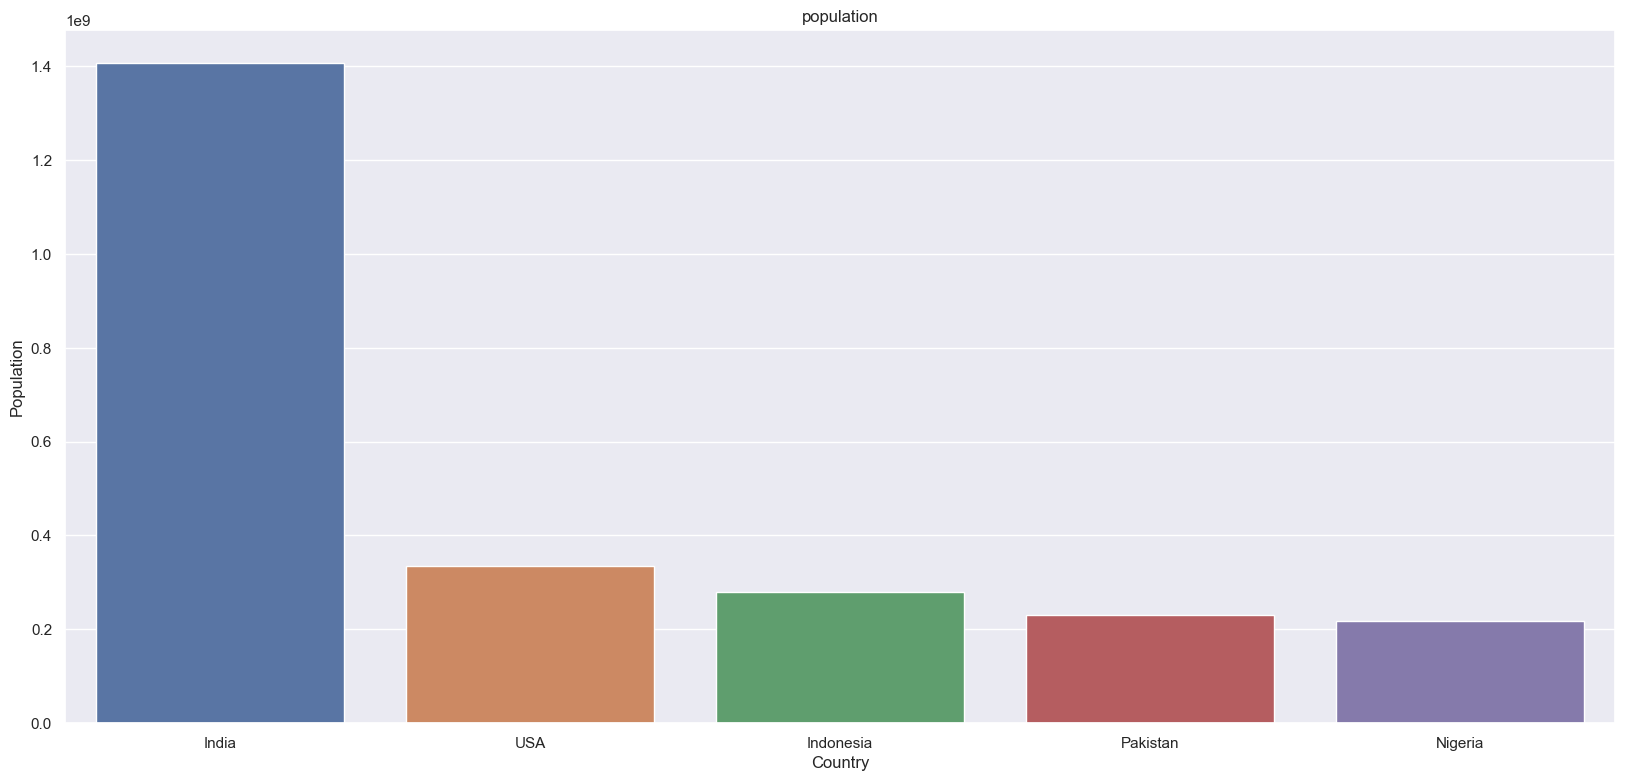

In [132]:
plt.figure(figsize=(20,9))
plt.title("population")
sns.barplot(x="Country",y="Population",data=population)

In [133]:
data

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,USA,104196861,1132935,101322779,1741147,1159832679,334805269
1,India,44682784,530740,44150289,1755,915265788,1406631776
2,France,39524311,164233,39264546,95532,271490188,65584518
3,Germany,37779833,165711,37398100,216022,122332384,83883596
4,Brazil,36824580,697074,35919372,208134,63776166,215353593
...,...,...,...,...,...,...,...
226,Diamond Princess,712,13,699,0,2216193,5676382
227,Vatican City,29,2570,29,0,2216193,799
228,Western Sahara,10,1,9,0,2216193,626161
229,MS Zaandam,9,2,7,0,2216193,5676382


In [134]:
data.to_csv("clean_covid_worldwidedata.csv",index=False)

In [135]:
one = OneHotEncoder()

In [137]:
one.fit_transform(data[["Country"]]).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])